# <center>Titanic - Machine Learning from Disaster</center>
___


### **Data Dictionary**
| Variable |                 Definition                 |                       Key                      |
|:--------:|:------------------------------------------:|:----------------------------------------------:|
| survival | Survival                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                |
| parch    | # of parents / children aboard the Titanic |                                                |
| ticket   | Ticket number                              |                                                |
| fare     | Passenger fare                             |                                                |
| cabin    | Cabin number                               |                                                |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

### **Variable Notes**

pclass: A proxy for socio-economic status (SES)<br>
1st = Upper<br>
2nd = Middle<br>
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...<br>
Sibling = brother, sister, stepbrother, stepsister<br>
Spouse = husband, wife (mistresses and fiancés were ignored)<br>

parch: The dataset defines family relations in this way...<br>
Parent = mother, father<br>
Child = daughter, son, stepdaughter, stepson<br>
Some children travelled only with a nanny, therefore parch=0 for them.

# 1. Import data

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv("https://raw.githubusercontent.com/vichShir/kaggle-getting-started-competitions/master/Titanic/Data/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/vichShir/kaggle-getting-started-competitions/master/Titanic/Data/test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# 2. Exploratory Analysis

## Filter by survivors

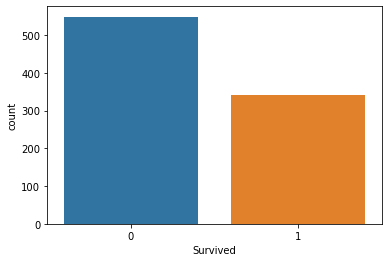

In [ ]:
sns.countplot(x='Survived', data = train)

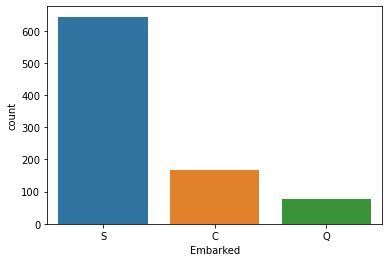

In [ ]:
sns.countplot(x='Embarked', data = train)

## Filter by sex  == female

c:\users\victo\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


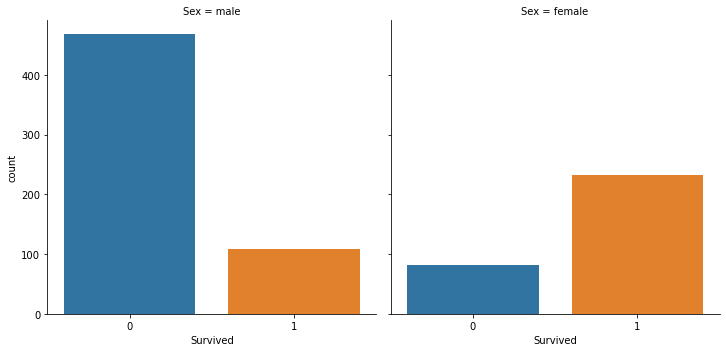

In [ ]:
sns.factorplot(x='Survived', col='Sex', kind='count', data = train)

In [ ]:
train.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

## Filter by Pclass == 1

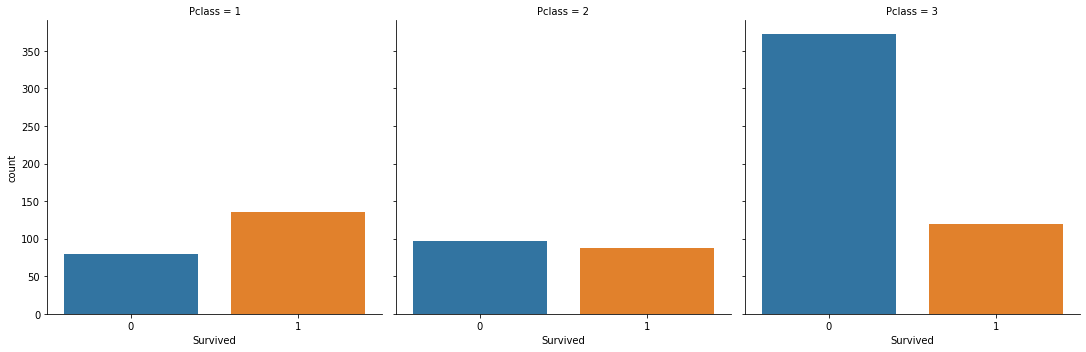

In [ ]:
sns.factorplot(x='Survived', col='Pclass', kind='count', data=train)

## Filter by Embarked == C

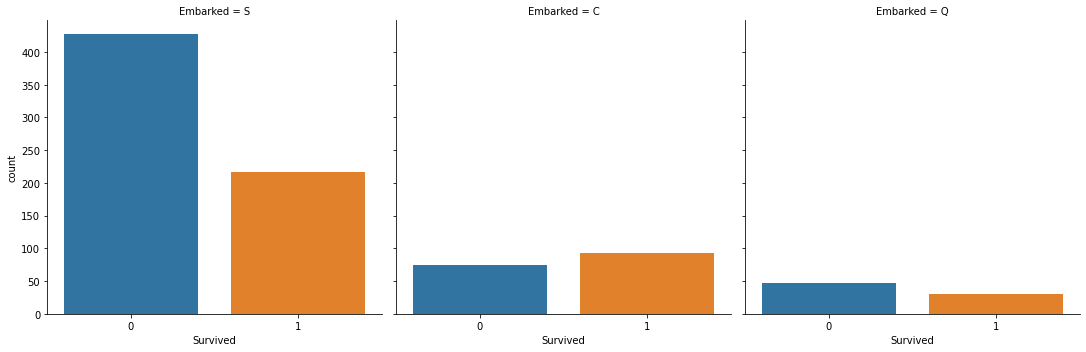

In [ ]:
sns.factorplot(x='Survived', col='Embarked', kind='count', data=train)

## Filter by Sex = female & Pclass = 1

In [ ]:
df_women = train[train.Sex == 'female']
df_men = train[train.Sex == 'male']
df_women

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


c:\users\victo\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


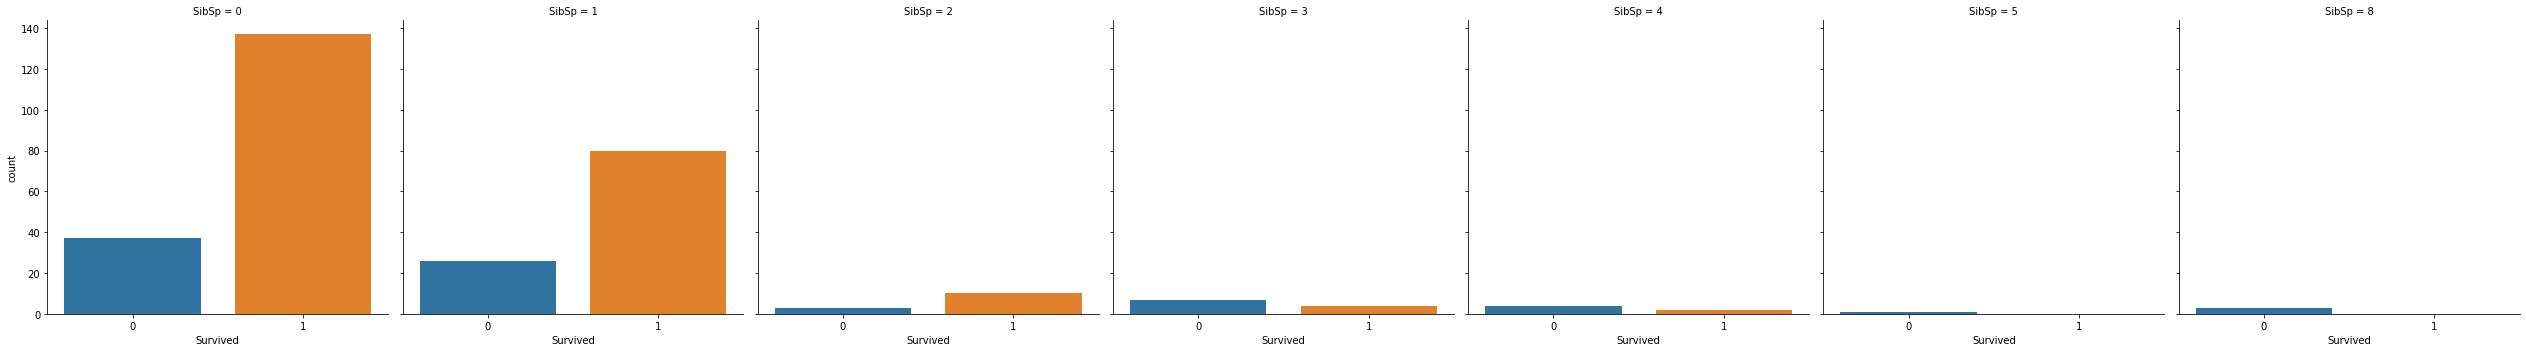

In [ ]:
sns.factorplot(x="Survived", col="SibSp", kind="count", data = df_women)

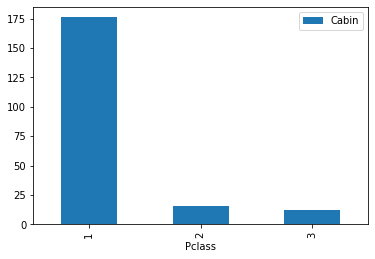

In [ ]:
train.groupby('Pclass').count()[['Cabin']].plot.bar()

# 3. Feature Engineering

In [94]:
# Copy the original train set
train_fts = train.copy()

## Feature transformation

### 1. Sex encoding

In [77]:
def transform_sex(value):
    if value == 'female':
        return 1
    return 0

In [95]:
train_fts['Sex_binary'] = train_fts['Sex'].map(transform_sex)
test['Sex_binary'] = test['Sex'].map(transform_sex)

### 2. Embarked

In [96]:
# Train set
train_fts['Embarked_S'] = (train_fts['Embarked'] == 'S').astype(int)
train_fts['Embarked_C'] = (train_fts['Embarked'] == 'C').astype(int)
train_fts['Embarked_Q'] = (train_fts['Embarked'] == 'Q').astype(int)

# Test set
test['Embarked_S'] = (test['Embarked'] == 'S').astype(int)
test['Embarked_C'] = (test['Embarked'] == 'C').astype(int)
test['Embarked_Q'] = (test['Embarked'] == 'Q').astype(int)

### 3. Null Cabine

In [97]:
train_fts['Cabine_nula'] = train_fts['Cabin'].isnull().astype(int)
test['Cabine_nula'] = test['Cabin'].isnull().astype(int)

### 4. Name title

#### Female

In [98]:
# Train set
train_fts['Nome_contem_Miss'] = train_fts['Name'].str.contains('Miss.').astype(int)
train_fts['Nome_contem_Mrs'] = train_fts['Name'].str.contains('Mrs.').astype(int)

# Test set
test['Nome_contem_Miss'] = test['Name'].str.contains('Miss.').astype(int)
test['Nome_contem_Mrs'] = test['Name'].str.contains('Mrs.').astype(int)

#### Male

In [99]:
# Train set
train_fts['Nome_contem_Master'] = train_fts['Name'].str.contains('Master').astype(int)
train_fts['Nome_contem_Col'] = train_fts['Name'].str.contains('Col').astype(int)
train_fts['Nome_contem_Major'] = train_fts['Name'].str.contains('Major').astype(int)
train_fts['Nome_contem_Mr'] = train_fts['Name'].str.contains('Mr.').astype(int)

# Test set
test['Nome_contem_Master'] = test['Name'].str.contains('Master').astype(int)
test['Nome_contem_Col'] = test['Name'].str.contains('Col').astype(int)
test['Nome_contem_Major'] = test['Name'].str.contains('Major').astype(int)
test['Nome_contem_Mr'] = test['Name'].str.contains('Mr.').astype(int)

### 5. Name title encoding

In [35]:
def name_encoding(data):
    '''
    Function by Aishani
    '''
    data['name_title'] = [np.nan for i in range(len(data))]

    data_name_title_1 = data[data['Name'].str.contains('Miss')]['Name']
    data_name_title_2 = data[data['Name'].str.contains('Mrs')]['Name']
    data_name_title_3 = data[data['Name'].str.contains('Master')]['Name']
    data_name_title_4 = data[data['Name'].str.contains('Mr')]['Name']
    data_name_title_5 = data[~ (data['Name'].str.contains('Miss') | data['Name'].str.contains('Mrs') | data['Name'].str.contains('Mr') | data['Name'].str.contains('Master'))]['Name']
    
    for i in range(len(data)):
        if data['Name'].iloc[i] in list(data_name_title_1):
            data['name_title'].iloc[i] = 0
        elif data['Name'].iloc[i] in list(data_name_title_2):
            data['name_title'].iloc[i] = 1
        elif data['Name'].iloc[i] in list(data_name_title_3):
            data['name_title'].iloc[i] = 2
        elif data['Name'].iloc[i] in list(data_name_title_4):
            data['name_title'].iloc[i] = 3
        elif data['Name'].iloc[i] in list(data_name_title_5):
            data['name_title'].iloc[i] = 4
        
    return data

In [100]:
train_fts = name_encoding(train_fts)
test = name_encoding(test)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [101]:
train_fts['name_title'].value_counts()

3.0    518
0.0    182
1.0    127
2.0     40
4.0     24
Name: name_title, dtype: int64

### 6. Deck

In [118]:
import string

def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if substring in str(big_string):
            return substring
    return np.nan

In [119]:
train_fts['Cabin'].value_counts().head()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
Name: Cabin, dtype: int64

In [120]:
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
train_fts['Deck'] = train_fts['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))
test['Deck'] = test['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))

### 7. Family size

In [121]:
#Creating new family_size column
train_fts['Family_Size'] = train_fts['SibSp'] + train_fts['Parch']
test['Family_Size'] = test['SibSp'] + test['Parch']

In [122]:
train_fts[['Survived', 'SibSp', 'Parch', 'Family_Size']].corr()

,Survived,SibSp,Parch,Family_Size
Survived,1.000000,-0.035322,0.081629,0.016639
SibSp,-0.035322,1.000000,0.414838,0.890712
Parch,0.081629,0.414838,1.000000,0.783111
Family_Size,0.016639,0.890712,0.783111,1.000000


### 8. Age*Class

In [123]:
train_fts['Age*Class'] = train_fts['Age'] * train_fts['Pclass']
test['Age*Class'] = test['Age'] * test['Pclass']

In [124]:
train_fts[['Survived', 'Age', 'Pclass', 'Age*Class']].corr()

,Survived,Age,Pclass,Age*Class
Survived,1.000000,-0.064910,-0.338481,-0.322708
Age,-0.064910,1.000000,-0.339898,0.568993
Pclass,-0.338481,-0.339898,1.000000,0.514117
Age*Class,-0.322708,0.568993,0.514117,1.000000


### 9. Fare per person

In [125]:
train_fts['Fare_Per_Person'] = train_fts['Fare'] / (train_fts['Family_Size'] + 1)
test['Fare_Per_Person'] = test['Fare'] / (test['Family_Size'] + 1)

In [126]:
train_fts[['Survived', 'Fare', 'Family_Size', 'Fare_Per_Person']].corr()

,Survived,Fare,Family_Size,Fare_Per_Person
Survived,1.000000,0.257307,0.016639,0.221600
Fare,0.257307,1.000000,0.217138,0.840995
Family_Size,0.016639,0.217138,1.000000,-0.099173
Fare_Per_Person,0.221600,0.840995,-0.099173,1.000000


## Preprocessing

In [23]:
from sklearn import preprocessing

In [24]:
def impute_missing_data(test, col, median, mode):
    '''
    Function by Aishani
    '''
    if col in test :
        test[col] = test[col].fillna('nan')

        test_feature = test.drop(test[test[col]== 'nan'].index, axis= 0)[col]

        nan_index = test[test[col]== 'nan'].index

        for i in nan_index:
            if median == True:
                test[col].iloc[i] = test_feature.median()
                test[col] = test[col].astype(np.float64)
            elif mode == True:
                test[col].iloc[i] = test_feature.value_counts().index[0]
        
    return test

In [127]:
train_fts = impute_missing_data(train_fts, 'Age', median=True, mode=False)
train_fts = impute_missing_data(train_fts, 'Embarked', median=False, mode=True)

In [128]:
test = impute_missing_data(test, 'Age', median=True, mode=False)
test = impute_missing_data(test, 'Fare', median=True, mode=False)

In [129]:
# Apply normalization
columns = train_fts.columns
min_max_scaler = preprocessing.MinMaxScaler()
for column in columns:
  if train_fts[column].dtype == 'float64':
    train_fts[column] = min_max_scaler.fit_transform(np.array(train_fts[column]).reshape(-1, 1))

In [130]:
# Apply normalization
columns = test.columns
min_max_scaler = preprocessing.MinMaxScaler()
for column in columns:
  if test[column].dtype == 'float64':
    test[column] = min_max_scaler.fit_transform(np.array(test[column]).reshape(-1, 1))

In [131]:
train_fts.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary,Embarked_S,Embarked_C,Embarked_Q,Cabine_nula,Nome_contem_Miss,Nome_contem_Mrs,Nome_contem_Master,Nome_contem_Col,Nome_contem_Major,Nome_contem_Mr,name_title,Deck,Family_Size,Age*Class,Fare_Per_Person
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,0.014151,NaN,S,0,1,0,0,1,0,0,0,0,0,1,0.75,NaN,1,0.293286,0.007076
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,1,0,PC 17599,0.139136,C85,C,1,0,1,0,0,0,1,0,0,0,1,0.25,C,1,0.170246,0.069568
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,0.015469,NaN,S,1,1,0,0,1,1,0,0,0,0,0,0.00,NaN,0,0.347649,0.015469


# 4. Modeling

In [ ]:
# baseline (woman)
p = (train['Sex_binary'] == 1).astype(np.int64)
np.mean(train['Survived'] == p)

0.7867564534231201

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [40]:
# Models
tree_model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=1, min_samples_split=2)
logr_model = LogisticRegression(solver='liblinear')
gnnb_model = GaussianNB()
ranf_model = RandomForestClassifier(n_estimators=100, n_jobs=1)
xgbt_model = XGBClassifier(colsample_bylevel=0.9,
                    colsample_bytree=0.8, 
                    gamma=0.99,
                    max_depth=4,
                    min_child_weight=1,
                    n_estimators=100,
                    nthread=4,
                    random_state=2,
                    silent=True)

## Feature selection

In [132]:
# Result of 76.555% accuracy
features = ['Sex_binary', 'Age']

In [ ]:
# Result of 77.272% accuracy
features = ['Sex_binary', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked_S', 'Embarked_C', 'Embarked_Q', 'Cabine_nula',
           'Nome_contem_Miss', 'Nome_contem_Mrs', 
           'Nome_contem_Master', 'Nome_contem_Col', 'Nome_contem_Major', 'Nome_contem_Mr']

In [115]:
# Result of 77.511% accuracy
features = ['Sex_binary', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked_S', 'Embarked_C', 'Embarked_Q', 'name_title', 'Cabine_nula',
           'Nome_contem_Miss', 'Nome_contem_Mrs', 
           'Nome_contem_Master', 'Nome_contem_Col', 'Nome_contem_Major', 'Nome_contem_Mr']

In [133]:
X = train_fts[features].fillna(-1)
y = train_fts['Survived']

print(X.columns)

Index(['Sex_binary', 'Age'], dtype='object')


In [134]:
X.head()

,Sex_binary,Age
0,0,0.271174
1,1,0.472229
2,1,0.321438
3,1,0.434531
4,0,0.434531


## Single evaluation

In [ ]:
def report_model(model, X, y, seed=2022):
    X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.5, random_state=seed)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print("Acurácia no dataset de treino: {:.3f}".format(model.score(X_train, y_train)))
    print("Acurácia no dataset de validação: {:.3f}".format(model.score(X_val, y_val)))
    cm = confusion_matrix(y_val, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()

Acurácia no dataset de treino: 0.838
Acurácia no dataset de validação: 0.800


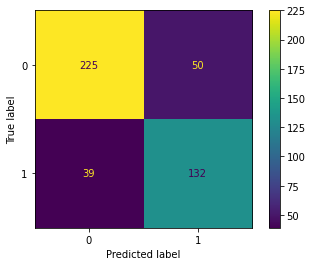

In [ ]:
report_model(tree_model, X, y)

Acurácia no dataset de treino: 0.831
Acurácia no dataset de validação: 0.823


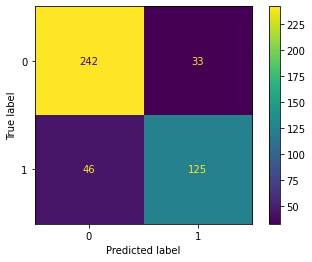

In [ ]:
report_model(logr_model, X, y)

Acurácia no dataset de treino: 0.735
Acurácia no dataset de validação: 0.733


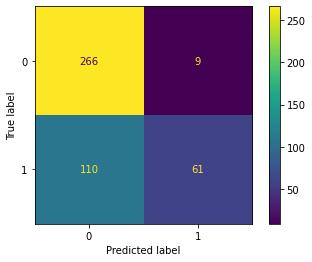

In [ ]:
report_model(gnnb_model, X, y)

Acurácia no dataset de treino: 0.991
Acurácia no dataset de validação: 0.800


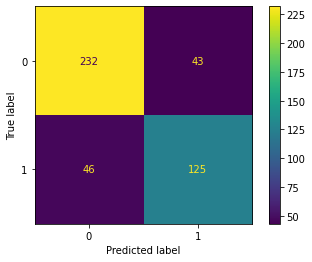

In [ ]:
report_model(ranf_model, X, y)

Acurácia no dataset de treino: 0.910
Acurácia no dataset de validação: 0.818


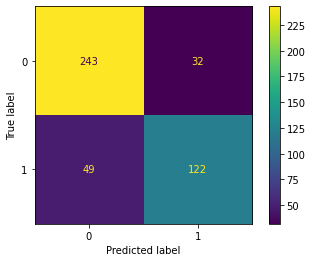

In [ ]:
report_model(xgbt_model, X, y)

## Cross validation

In [44]:
def report_cross_val(model, X, y, folds=10, seed=2022):
    accuracy = []
    auc_score = []
    kf = RepeatedKFold(n_splits=2, n_repeats=folds, random_state=seed)
    for linhas_treino, linhas_valid in kf.split(X):
        X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
        y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

        # Train the model
        model.fit(X_treino, y_treino)
        p = model.predict(X_valid)

        # Append accuracy
        acc = np.mean(y_valid == p)
        accuracy.append(acc)

        # Append AUC
        auc = roc_auc_score(y_valid, p)
        auc_score.append(auc)

    return accuracy, auc_score

In [45]:
# Create dataframe to compare results
model_scores = pd.DataFrame(index=['Decision Tree', 'Logistic Regression', 'Naive Bayes', 'Random Forest', 'XGBoost'])
acc_mean = []
acc_std = []
auc_mean = []
auc_std = []

In [46]:
### Decision Tree ###
tree_acc, tree_auc = report_cross_val(tree_model, X, y)

# Accuracy
acc_mean.append(np.mean(tree_acc))
acc_std.append(np.std(tree_acc))

# AUC Score
auc_mean.append(np.mean(tree_auc))
auc_std.append(np.std(tree_auc))

In [47]:
### Logistic Regression ###
logr_acc, logr_auc = report_cross_val(logr_model, X, y)

# Accuracy
acc_mean.append(np.mean(logr_acc))
acc_std.append(np.std(logr_acc))

# AUC Score
auc_mean.append(np.mean(logr_auc))
auc_std.append(np.std(logr_auc))

In [48]:
### Naive Bayes ###
gnnb_acc, gnnb_auc = report_cross_val(gnnb_model, X, y)

# Accuracy
acc_mean.append(np.mean(gnnb_acc))
acc_std.append(np.std(gnnb_acc))

# AUC Score
auc_mean.append(np.mean(gnnb_auc))
auc_std.append(np.std(gnnb_auc))

In [49]:
### Random Forest ###
ranf_acc, ranf_auc = report_cross_val(ranf_model, X, y)

# Accuracy
acc_mean.append(np.mean(ranf_acc))
acc_std.append(np.std(ranf_acc))

# AUC Score
auc_mean.append(np.mean(ranf_auc))
auc_std.append(np.std(ranf_auc))

In [50]:
### XGBoost ###
xgbt_acc, xgbt_auc = report_cross_val(xgbt_model, X, y)

# Accuracy
acc_mean.append(np.mean(xgbt_acc))
acc_std.append(np.std(xgbt_acc))

# AUC Score
auc_mean.append(np.mean(xgbt_auc))
auc_std.append(np.std(xgbt_auc))

In [51]:
# Save scores
model_scores['Accuracy'] = [round(x, 2) for x in acc_mean]
model_scores['Accuracy Std'] = [round(x, 2) for x in acc_std]
model_scores['AUC'] = [round(x, 2) for x in auc_mean]
model_scores['AUC Std'] = [round(x, 2) for x in auc_std]

In [ ]:
# Features: Age and Sex (baseline)
model_scores

,Accuracy,Accuracy Std,AUC,AUC Std
Decision Tree,0.78,0.02,0.76,0.02
Logistic Regression,0.79,0.01,0.77,0.01
Naive Bayes,0.79,0.01,0.77,0.01
Random Forest,0.76,0.02,0.74,0.02
XGBoost,0.79,0.02,0.77,0.02


In [52]:
model_scores

,Accuracy,Accuracy Std,AUC,AUC Std
Decision Tree,0.80,0.02,0.78,0.03
Logistic Regression,0.82,0.02,0.81,0.02
Naive Bayes,0.70,0.13,0.71,0.09
Random Forest,0.80,0.02,0.79,0.02
XGBoost,0.82,0.02,0.80,0.02


## Export predictions on test dataset

In [53]:
def export_prediction(model, X_train, y_train, X_test, passengerCol, path):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy: {:.3f}".format(model.score(X_train, y_train)))
    pred = pd.Series(y_pred, index=passengerCol, name='Survived')
    pred.to_csv(path, header=True)

In [135]:
export_prediction(logr_model, X, y, 
               test[features],
               test['PassengerId'], 
               'logreg.csv')

Accuracy: 0.787
